In [21]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras.utils import plot_model
import numpy as np

X_train size 60000, X_test size 10000


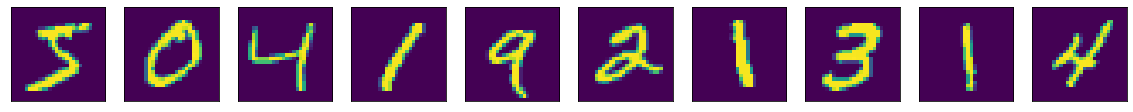

In [22]:
(x_train,  y_train), (x_test, y_test) = mnist.load_data()

x_train_top = x_train[:10]

print("X_train size %s, X_test size %s" % (len(x_train), len(x_test)))

plt.figure(figsize=(20, 4))
for index in range(len(x_train_top)):
    # display original
    ax = plt.subplot(2, len(x_train_top), index + 1)
    plt.imshow(x_train_top[index])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [24]:
y_train = pd.get_dummies(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

# plot_model(model, show_shapes=True)

In [26]:
def find_incorret_predited_image_index(y_dataset, y_correct_answers, start_index):
    index = start_index
    while True:
        if index >= len(y_dataset):
            break
        y_predited = np.where(y_dataset[index] == max(y_dataset[index]))[0][0]
        y_correct  = np.where(y_correct_answers[index] == 1)[0][0]
        if y_predited == y_correct:
            index += 1
            continue
        return index
    return -1

def plot_result(x_dataset, y_dataset, number_of_rows=2, number_of_colums=20, only_wrong = False, y_correct_answers = None):
    # create main plot
    fig, ax = plt.subplots(
        figsize=(
            number_of_colums if number_of_colums < 20 else 20, 
            number_of_rows*1.2
        ),
        nrows=number_of_rows if number_of_rows > 2 else 2, 
        ncols=number_of_colums if number_of_colums > 2 else 2)
    
    # plot each subplots
    number_of_ploted_images = 0
    index = 0
    for row in ax:
        for col in row:
            if only_wrong:
                #find next incorrect predited image
                index = find_incorret_predited_image_index(y_dataset, y_correct_answers, index)
                if index == -1:
                    break
            
            # plot image
            y = np.where(y_dataset[index] == max(y_dataset[index]))[0][0]
            col.title.set_text(str(y))
            col.imshow(x_dataset[index].reshape(28, 28))
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
            
            # iterate to next image
            index += 1
            number_of_ploted_images += 1
            if number_of_ploted_images >= len(x_dataset):
                break
                
    if number_of_ploted_images > 0:
        plt.show()

In [27]:
from keras.models import Model
from keras.callbacks import Callback

class DisplayingDataCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        x_dataset = self.validation_data[0]
        y_pred = self.model.predict(x_dataset)    
        y_correct_anwsers = y_test
        
        # plot first x*y results
        plot_result(x_dataset, y_pred, 2, 20) 
        
        # printing only incorrect results
        plot_result(x_dataset, y_pred, 2, 20, True, y_correct_anwsers)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.2616 - accuracy: 0.9183 - val_loss: 0.0573 - val_accuracy: 0.9806


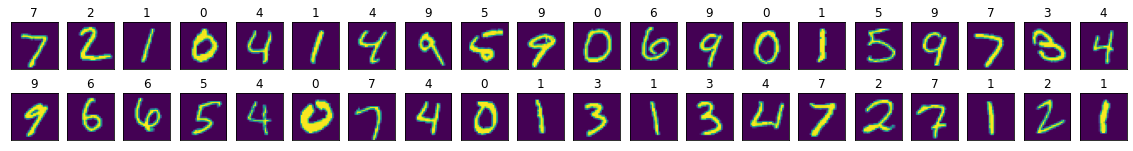

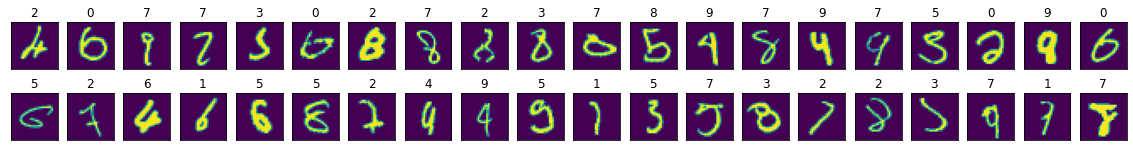

Epoch 2/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0882 - accuracy: 0.9734 - val_loss: 0.0461 - val_accuracy: 0.9849


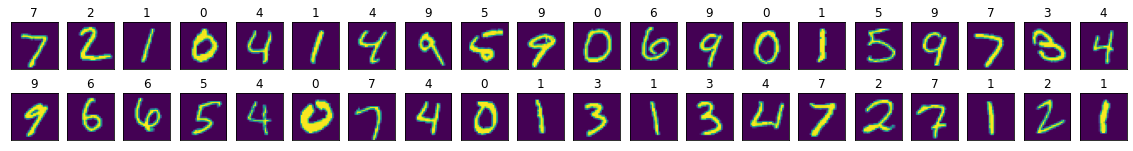

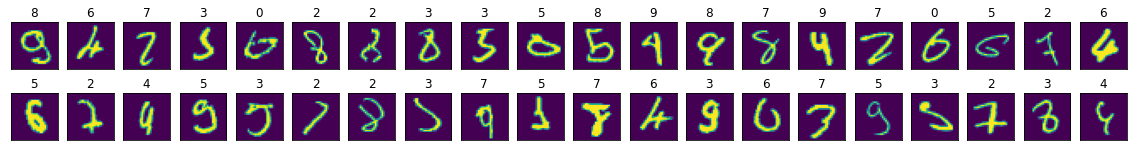

Epoch 3/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.0678 - accuracy: 0.9796 - val_loss: 0.0349 - val_accuracy: 0.9876


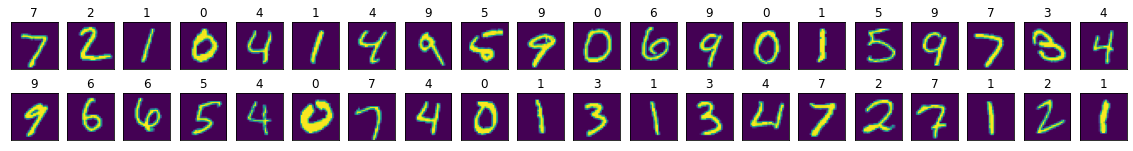

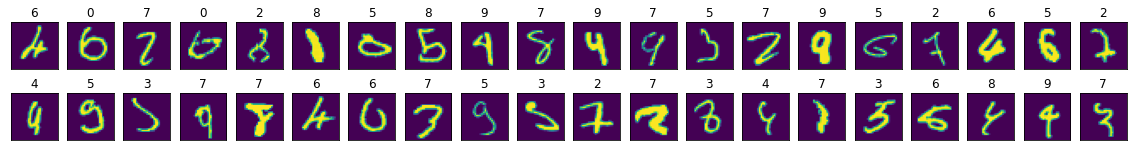

Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0322 - val_accuracy: 0.9891


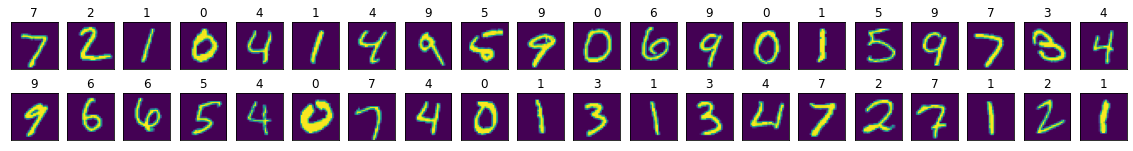

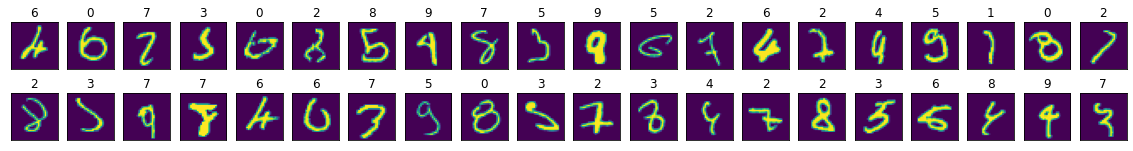

Epoch 5/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9880


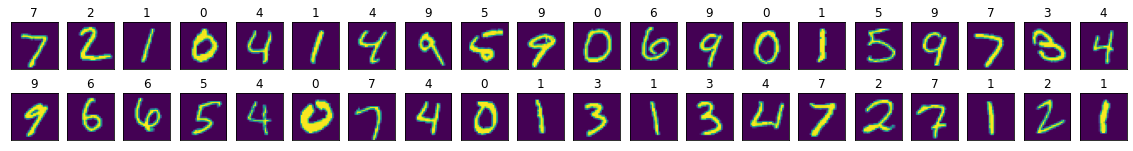

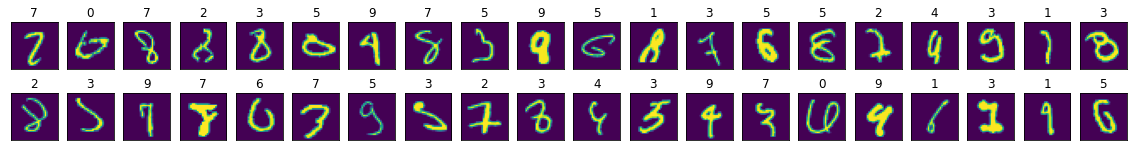

In [28]:
model.fit(x_train, 
            y_train, 
            batch_size=128, 
            epochs=5, 
            validation_data=(x_test, y_test),
            callbacks=[DisplayingDataCallback()],
         )

In [29]:
score = model.evaluate(x_test, y_test)
print("Loss: %s Acc: %s" % (score[0], score[1]))

10000/10000 [==============================] - 1s 150us/step
Loss: 0.0363278791598801 Acc: 0.9879999756813049


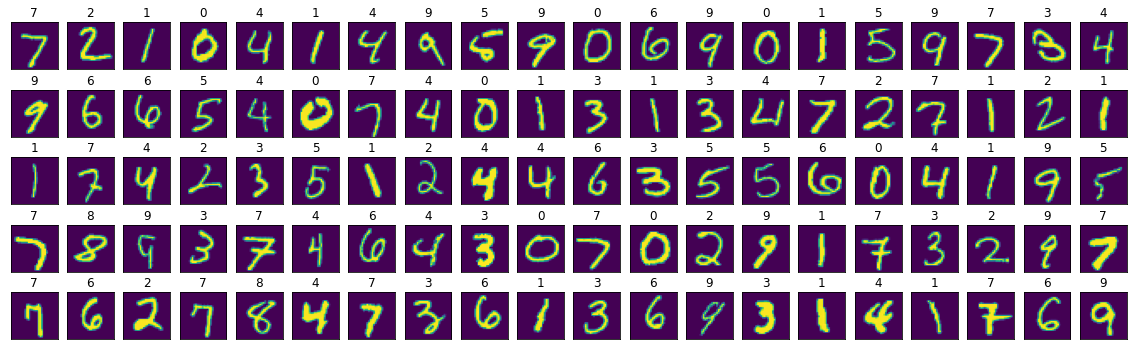

In [30]:
y_pred = model.predict(x_test)
plot_result(x_test, y_pred, 5, 20)

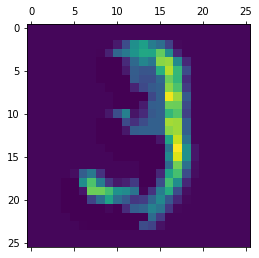

In [31]:
from keras.models import Model

layers = [ layer.output for layer in model.layers ]

activation_model = Model(inputs= model.input, outputs = layers)
activations = activation_model.predict(x_train[10].reshape(1, 28, 28, 1))
activation_layer = activations[0]

plt.matshow(activation_layer[0, :, :, 18], cmap='viridis')

In [32]:
!pip install VisualiseKerasLayers

D:\anaconda3\envs\GPU-test\lib\site-packages\VisualiseKerasLayers\Visualise.py:54: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
D:\anaconda3\envs\GPU-test\lib\site-packages\VisualiseKerasLayers\Visualise.py:44: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()
D:\anaconda3\envs\GPU-test\lib\site-packages\matplotlib\tight_bbox.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
D:\anaconda3\envs\GPU-test\lib\site-packages\matplotlib\tight_bbox.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
D:\anaconda3\envs\GPU-test\lib\site-packages\matplotlib\patches.py:781: RuntimeWarning: invalid value encountered in double_scalars
  self._y1 = self._y0 + self._height
D:\anaconda3\envs\GPU-test\lib

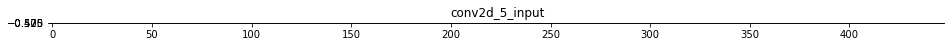

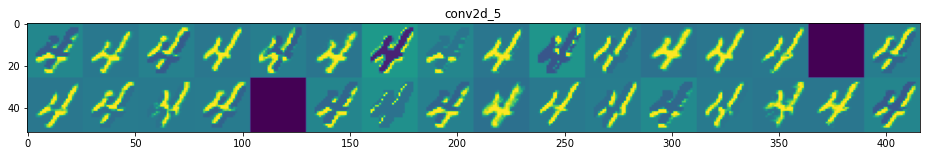

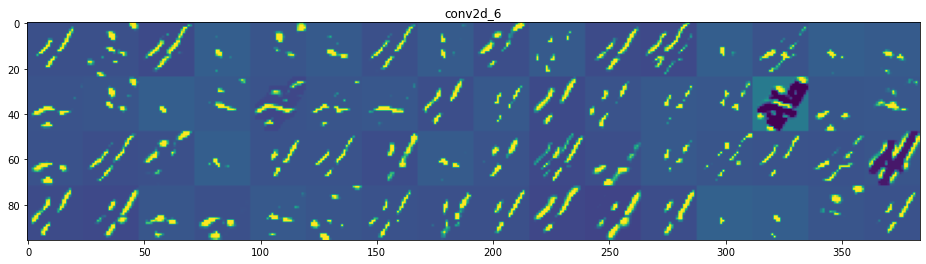

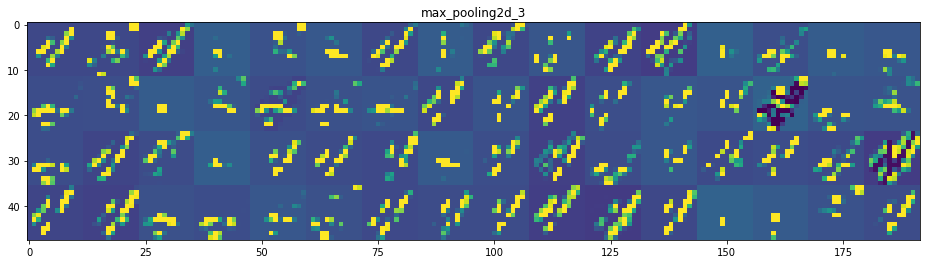

In [33]:
from VisualiseKerasLayers import display_activations_grid


display_activations_grid(activation_model, x_train[9])